In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 1000)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import createXYPlot
from utils import getVariables
from datetime import datetime

today = str(datetime.now().date())
print(today)
plots_folder = f"./plots/{today}/iss"
os.system(f"mkdir -p {plots_folder}")

2022-01-22


0

### Iss data

In [2]:
df_ti = pd.read_csv("./data/rapporti_ISS - TI.csv")
df_decessi = pd.read_csv("./data/rapporti_ISS - Decessi.csv")
df_ricoveri = pd.read_csv("./data/rapporti_ISS - Ricoveri.csv")
df_contagi = pd.read_csv("./data/rapporti_ISS - Contagi.csv")
df_pop = pd.read_csv("./data/rapporti_ISS - Popolazione.csv")

In [3]:
cols_to_select = [x for x in df_pop.columns if "frac" not in x and x != "cut"]
df_pop = df_pop[cols_to_select]
df_pop["data"] = pd.to_datetime(df_pop["data"]).dt.date
df_pop = df_pop.rename(columns={"data":"data_pop"})

In [4]:
df_dict = {
    "contagi": df_contagi,
    "ricoveri": df_ricoveri,
    "terapie_intensive": df_ti, 
    "decessi": df_decessi
}

In [5]:
for d in df_dict.items():
    d[1]["split"] = d[0]

In [6]:
df_iss = pd.concat(df_dict.values()).reset_index(drop=True)
df_iss["tot"] = df_iss["vax"] + df_iss["no_vax"]
df_iss["data"] = pd.to_datetime(df_iss["data"]).dt.date

In [7]:
age_values = df_iss["fascia_eta"].unique()
splits = df_iss["split"].unique()

In [8]:
from datetime import timedelta
df_iss["data_pop"] = df_iss["data"].apply(lambda x: x - timedelta(14))

In [9]:
df_iss = df_iss.merge(df_pop, on=["data_pop","fascia_eta"], how="left", suffixes=("","_pop"))

### Incidence

In [10]:
vnames = ["no_vax", "vax"]
for v in vnames:
    df_iss[f"{v}_100k"] = (1e5)*df_iss[v]/df_iss[f"{v}_pop"]
df_iss["eff"] = 100*(1 - df_iss[f"vax_100k"]/df_iss[f"no_vax_100k"])

,data,no_vax_100k,vax_100k
4,2021-11-07,483.953431,122.011740
9,2021-11-14,643.097858,164.990966
14,2021-11-21,816.080858,220.765450
19,2021-11-28,1019.798641,287.681595
24,2021-12-05,1278.436013,359.885271
29,2021-12-12,1601.383283,438.416948
34,2021-12-19,2000.625458,562.106418
39,2021-12-26,2480.132878,849.393879
44,2022-01-02,3774.805890,1809.843200
49,2022-01-09,6164.565193,3336.867423


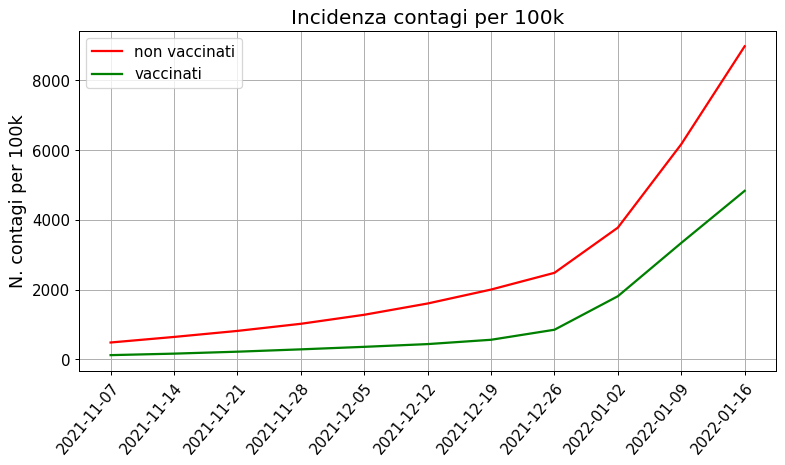

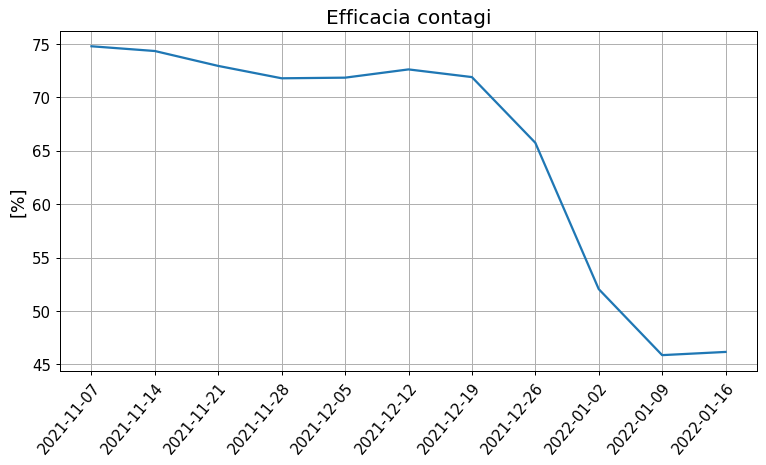

,data,no_vax_100k,vax_100k
59,2021-10-24,NaN,NaN
64,2021-10-31,NaN,NaN
69,2021-11-07,45.008560,8.477899
74,2021-11-14,47.478133,8.802234
79,2021-11-21,58.027847,10.554901
84,2021-11-28,68.619516,12.305456
89,2021-12-05,81.517096,14.341299
94,2021-12-12,98.576526,16.194579
99,2021-12-19,117.724842,18.035990
104,2021-12-26,139.078580,21.392538


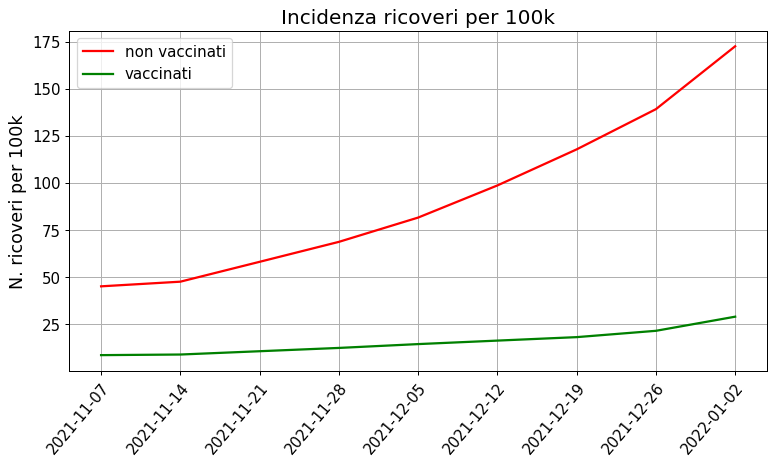

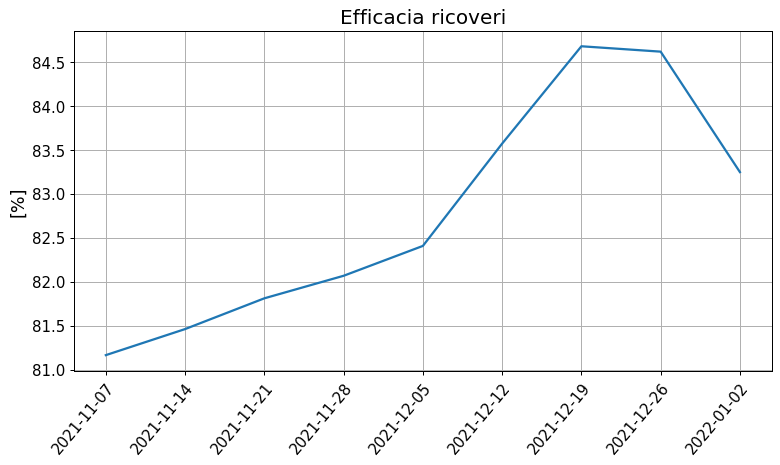

,data,no_vax_100k,vax_100k
114,2021-10-24,NaN,NaN
119,2021-10-31,NaN,NaN
124,2021-11-07,6.130414,0.621348
129,2021-11-14,6.944297,0.652258
134,2021-11-21,8.146572,0.803465
139,2021-11-28,10.088325,0.916204
144,2021-12-05,12.164479,1.053122
149,2021-12-12,14.467387,1.252961
154,2021-12-19,17.094136,1.372975
159,2021-12-26,19.893297,1.500002


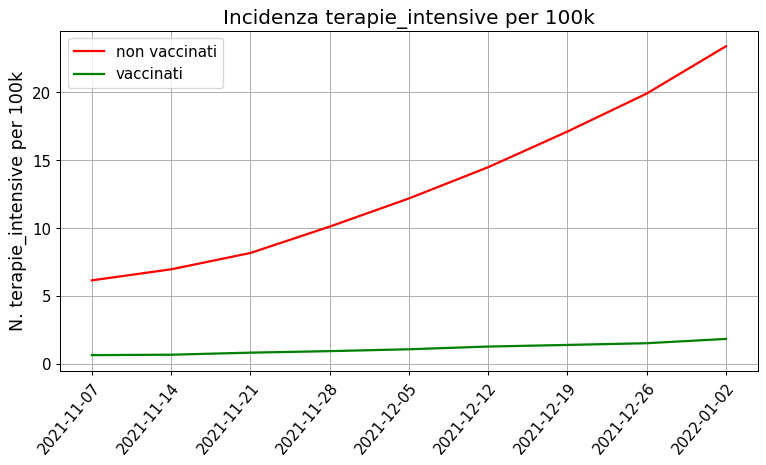

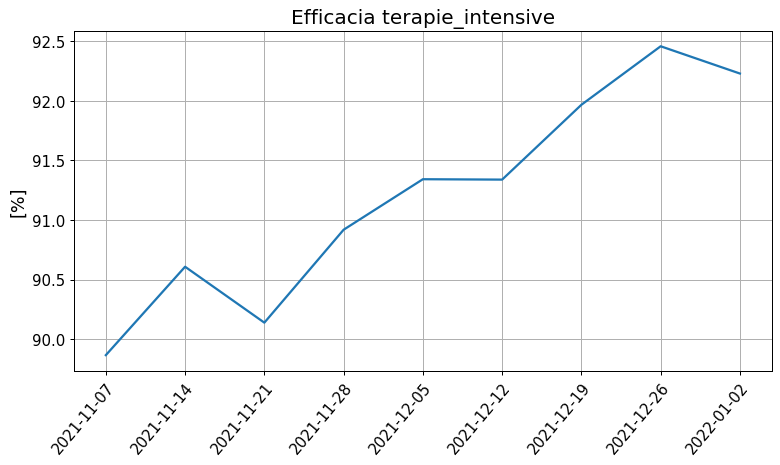

,data,no_vax_100k,vax_100k
169,2021-10-17,NaN,NaN
174,2021-10-24,NaN,NaN
179,2021-10-31,NaN,NaN
184,2021-11-07,6.202678,1.557746
189,2021-11-14,7.885465,1.811587
194,2021-11-21,9.517516,2.225145
199,2021-11-28,11.330796,2.486839
204,2021-12-05,13.631897,2.861838
209,2021-12-12,16.338651,3.368268
214,2021-12-19,20.521496,3.614435


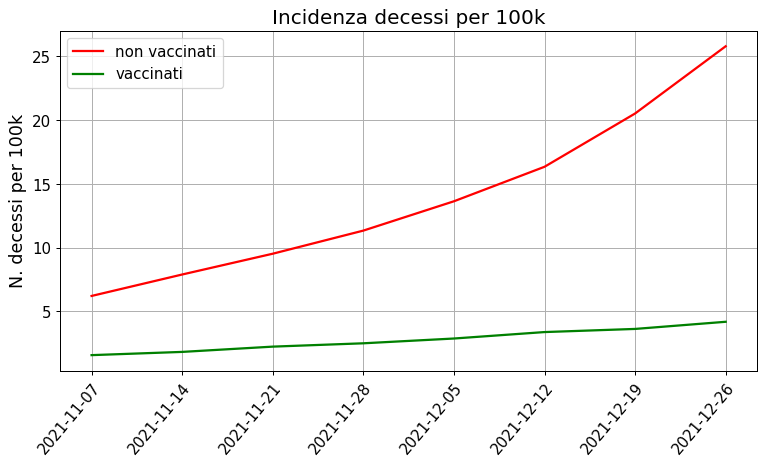

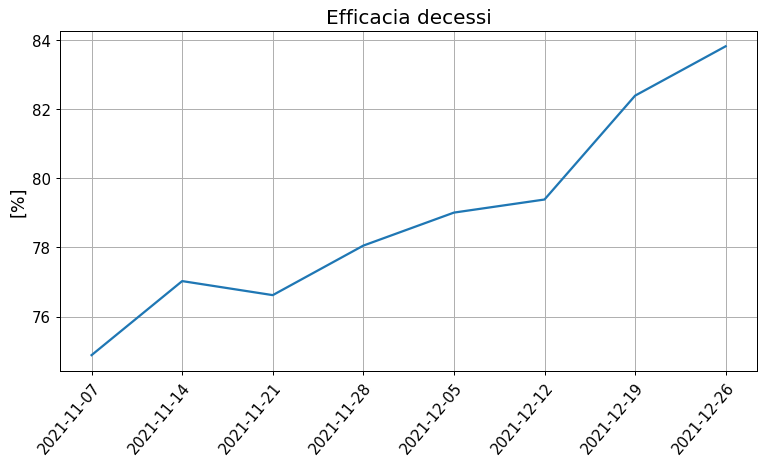

In [11]:
for s in ["contagi","ricoveri","terapie_intensive","decessi"]:
    
    df_plt = df_iss[(df_iss.split==s) & (df_iss.fascia_eta=="totale")]
    display(df_plt[["data","no_vax_100k","vax_100k"]])
    df_plt = df_plt.dropna()
    vplot = [f"{v}_100k" for v in vnames]
    createXYPlot(df_plt,
                 x="data",
                 y=vplot,
                 colors=["r","g"],
                 labels=["non vaccinati", "vaccinati"],
                 plots_folder=plots_folder,
                 title=f"Incidenza {s} per 100k",
                 figsize_x=10,
                 figsize_y=5,
                 dpis=90,
                 ytitle=f"N. {s} per 100k",
                 savename=f"{s}_per_100k",
                 linewidth=1.8,
                 days_interval=1)
    
    createXYPlot(df_plt,
                 x="data",
                 y=["eff"],
                 plots_folder=plots_folder,
                 title=f"Efficacia {s}",
                 figsize_x=10,
                 figsize_y=5,
                 dpis=90,
                 linewidth=1.8,
                 ytitle="[%]",
                 savename=f"efficacia_{s}",
                 days_interval=1)

In [12]:
df_iss[["data","fascia_eta","eff","no_vax_pop","vax_pop","split"]]

,data,fascia_eta,eff,no_vax_pop,vax_pop,split
0,2021-11-07,12-39,79.055474,3649047.0,13786508.0,contagi
1,2021-11-07,40-59,71.807425,3102638.0,15334867.0,contagi
2,2021-11-07,60-79,70.891666,1318627.0,12254152.0,contagi
3,2021-11-07,80+,75.302563,232553.0,4331550.0,contagi
4,2021-11-07,totale,74.788537,8302865.0,45707077.0,contagi
5,2021-11-14,12-39,78.127262,3423613.0,14011942.0,contagi
6,2021-11-14,40-59,71.533242,2932766.0,15504739.0,contagi
7,2021-11-14,60-79,69.827518,1278622.0,12294157.0,contagi
8,2021-11-14,80+,76.140260,227566.0,4336537.0,contagi
9,2021-11-14,totale,74.344345,7862567.0,46147375.0,contagi


In [13]:
def plot_vax_vs_no_vax(age: str, 
                       split: str):
    
    plt.figure(dpi=100, figsize=(10,5))
    df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)].reset_index()
    title = f"{split}"
    if age != "totale":
        title += f" {age}"
    createXYPlot(df_plt,
                 y=["no_vax_frac"],
                 labels=["frazione non vaccinati"],
                 colors=["r"],
                 x="data",
                 plots_folder="./plots",
                 days_interval=1,
                 linewidth=1.8,
                 title=title.replace("_"," ")
                )

<Figure size 1000x500 with 0 Axes>

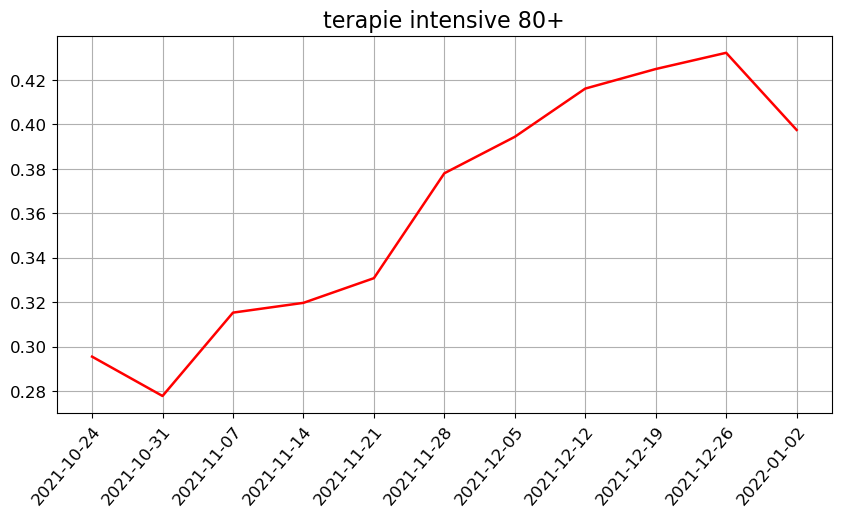

In [26]:
plot_vax_vs_no_vax("80+", "terapie_intensive")

In [15]:
df_iss["no_vax_frac_err"] = 1.645*np.sqrt((df_iss["no_vax_frac"]*df_iss["vax_frac"])/(df_iss["no_vax"] + df_iss["vax"]))
df_iss["no_vax_frac_err_lo"] = df_iss["no_vax_frac"] - df_iss["no_vax_frac_err"]
df_iss["no_vax_frac_err_hi"] = df_iss["no_vax_frac"] + df_iss["no_vax_frac_err"]

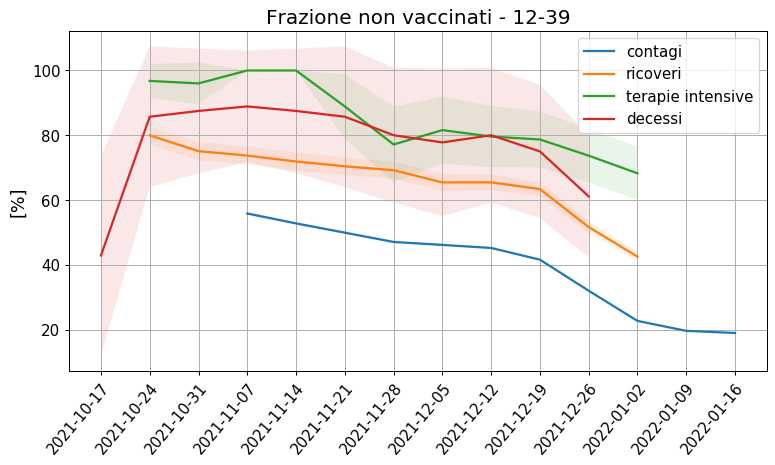

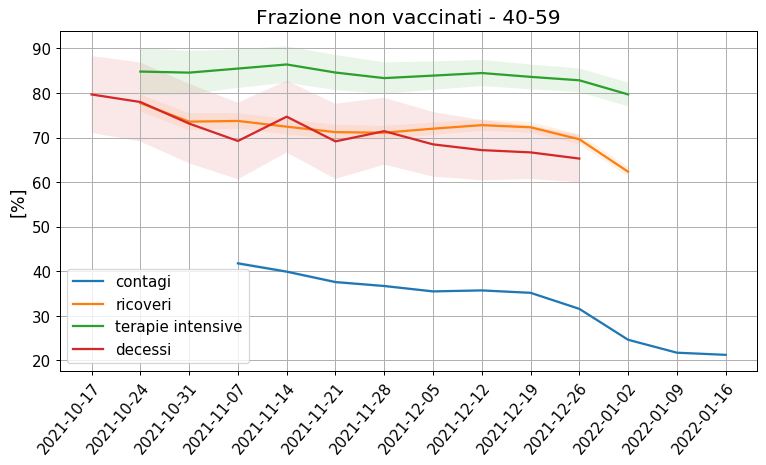

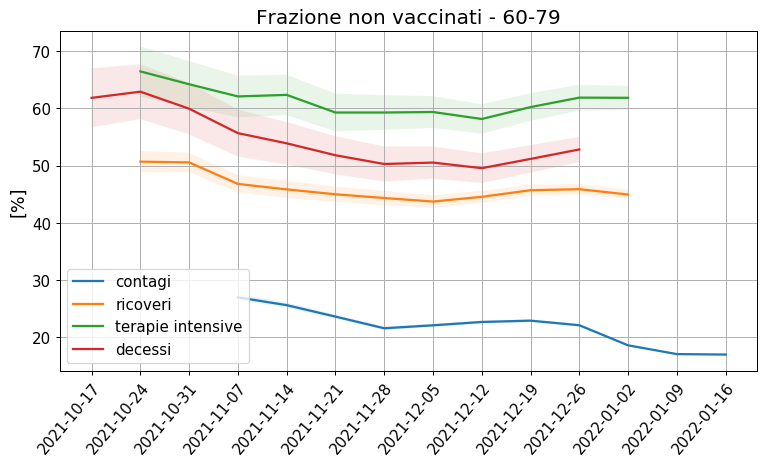

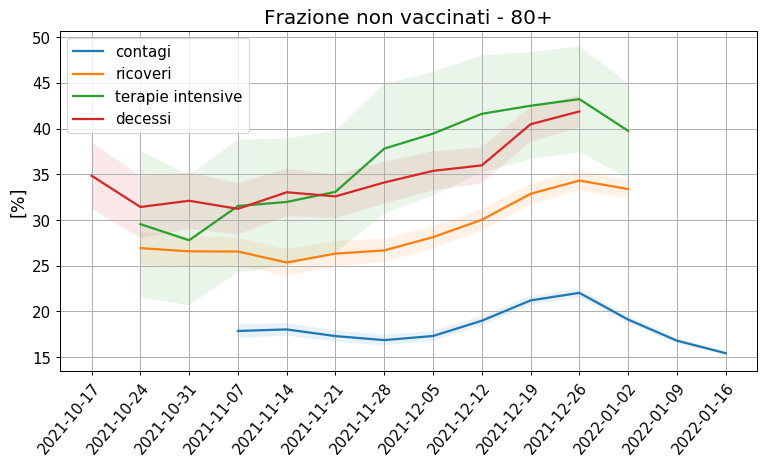

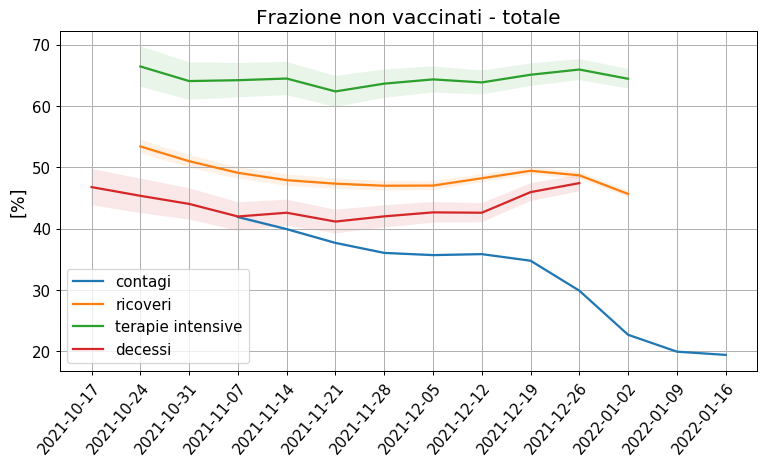

In [16]:
for age in sorted(age_values):
    plt.figure(dpi=90, figsize=(10,5))
    dates_str = []
    dates = []
    for split in ["contagi", "ricoveri", "terapie_intensive", "decessi"]:
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        dates_str += [x.strftime("%Y-%m-%d") for x in df_plt.data.unique()]
        dates += [x for x in df_plt.data.unique()]
        plt.plot(df_plt.data,
                 100*df_plt.no_vax_frac,
                 label=split.replace("_"," "),
                 linewidth=1.8
                )
        plt.fill_between(df_plt.data, 
                     100*df_plt.no_vax_frac_err_lo, 
                     100*df_plt.no_vax_frac_err_hi,
                     alpha=0.1
                    )
    title = f"Frazione non vaccinati - {age}"
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("[%]",fontsize=14)
    
    dates_str = sorted(list(set(dates_str)), reverse=False)
    dates = sorted(list(set(dates)), reverse=False)
    plt.xticks(dates,
               dates_str,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right")
    plt.savefig(f"{plots_folder}/frazione_no_vax_{age}",bbox_inches="tight")

In [17]:
def plot_var_ages(split, varname="vax"):
    plt.figure(dpi=90, figsize=(10,5))
    for age in sorted(age_values):
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split=="terapie_intensive")]
        plt.plot(df_plt.data,
            df_plt[varname],
            label=age,
            linewidth=1.8)
    title = f"Totale {varname} {split}".replace("_", " ")
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(df_plt.data,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right"
              )

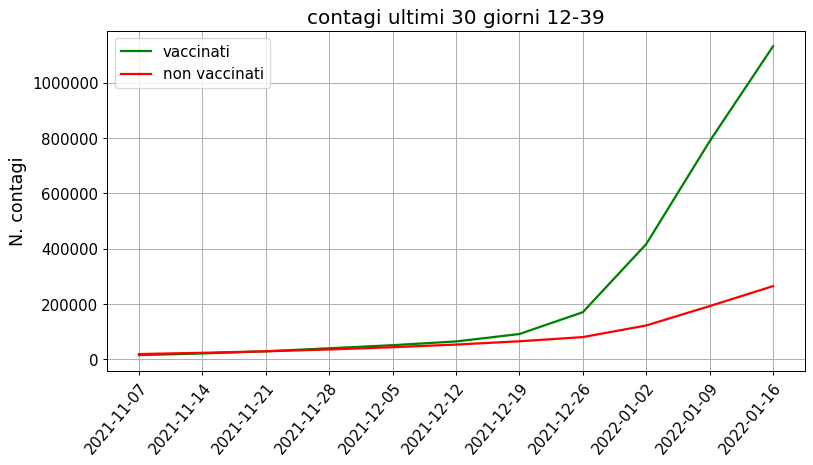

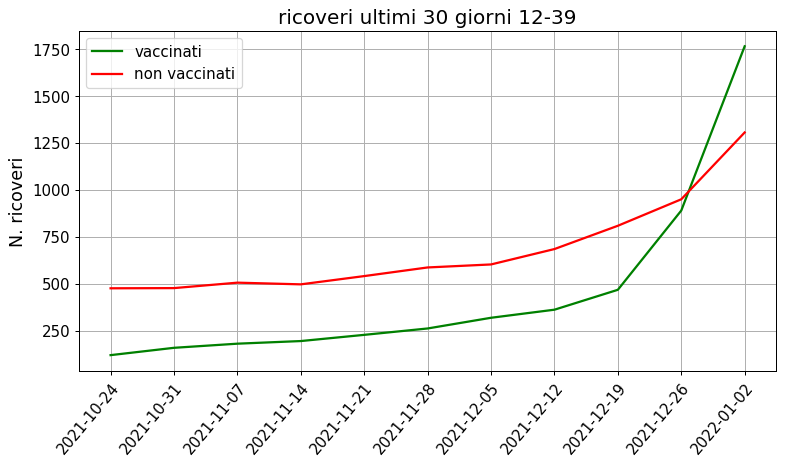

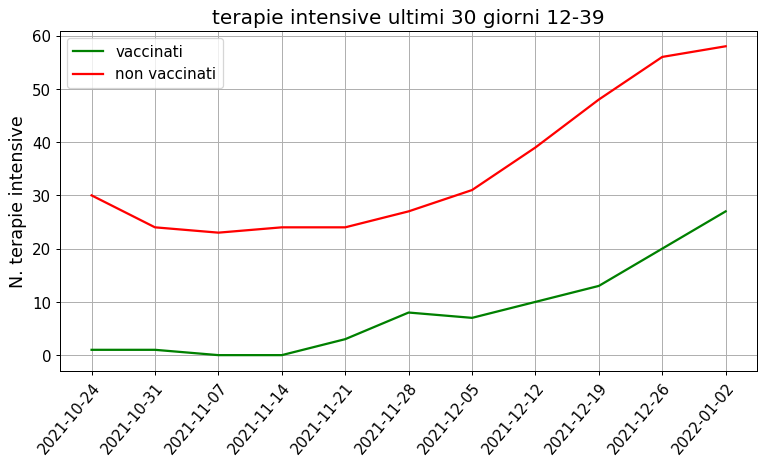

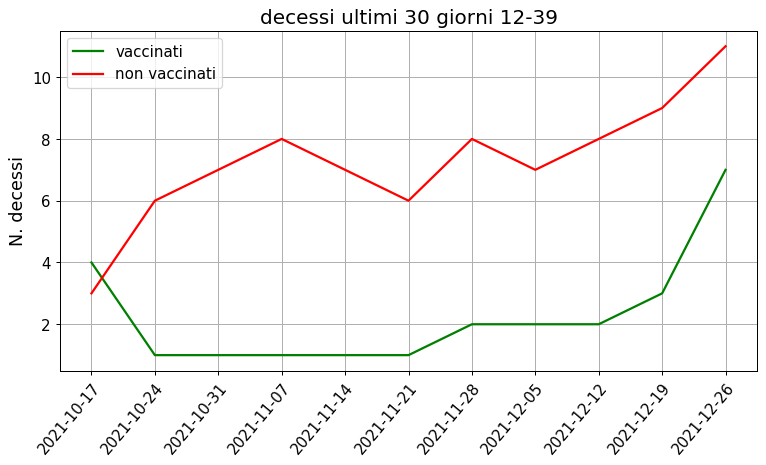

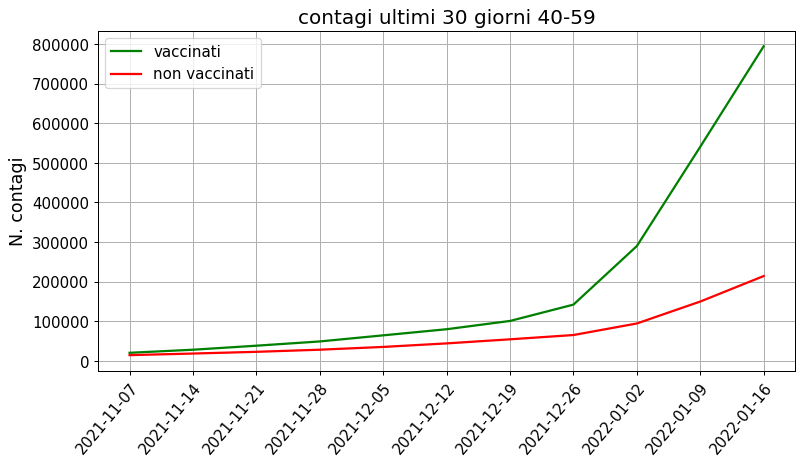

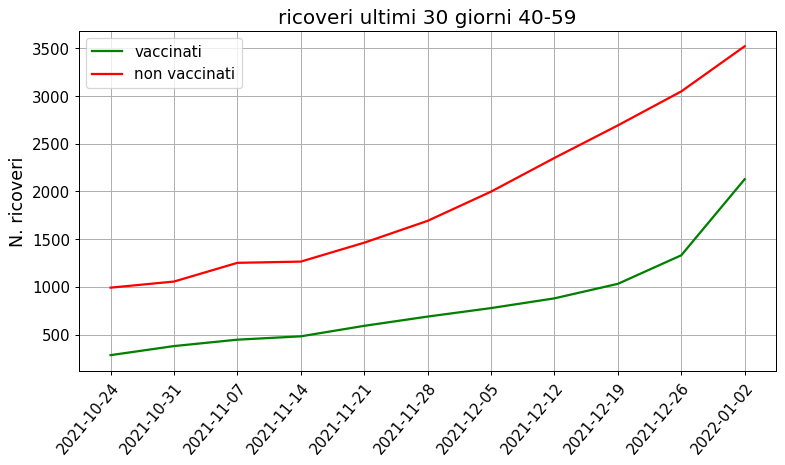

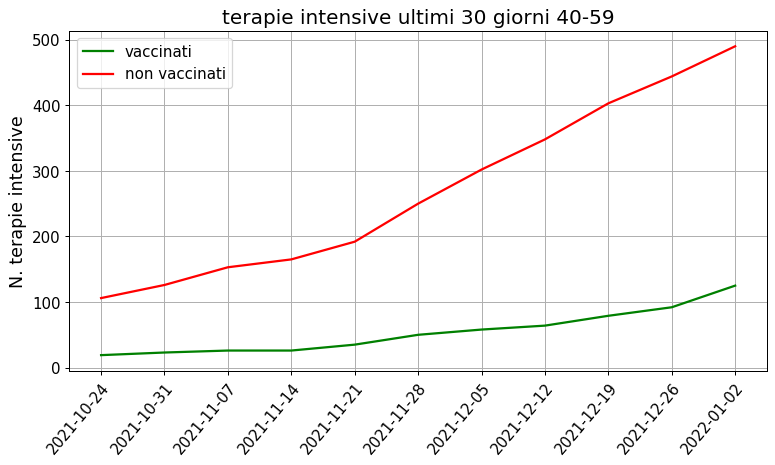

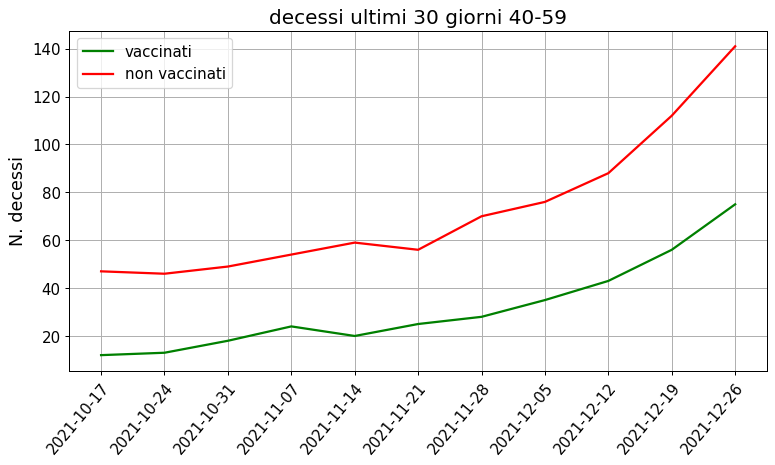

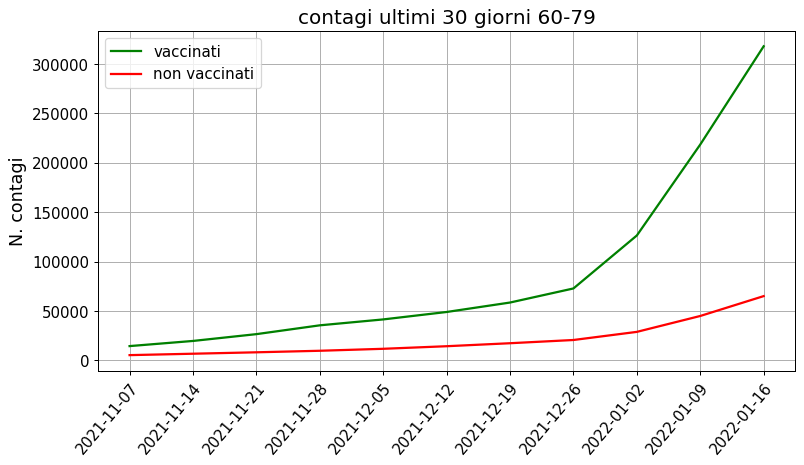

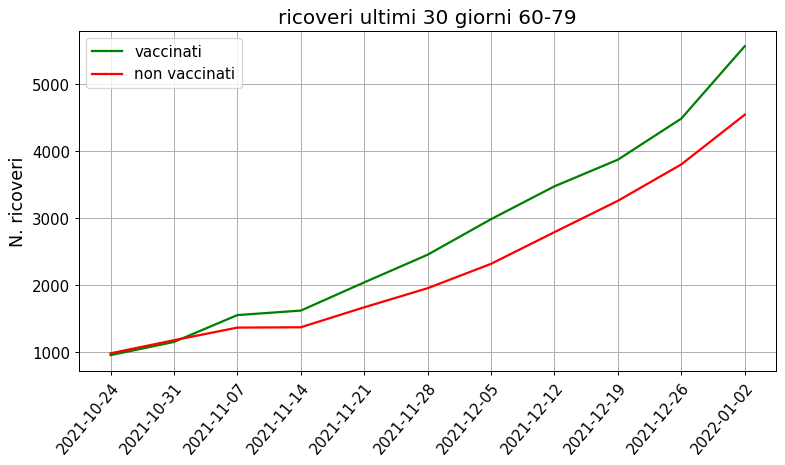

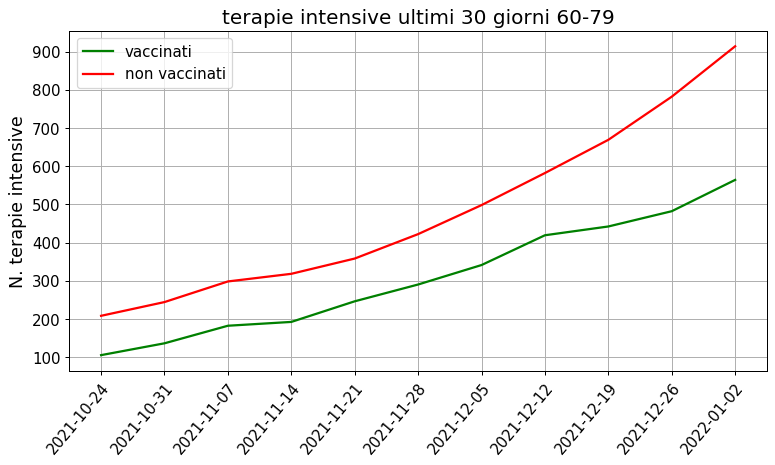

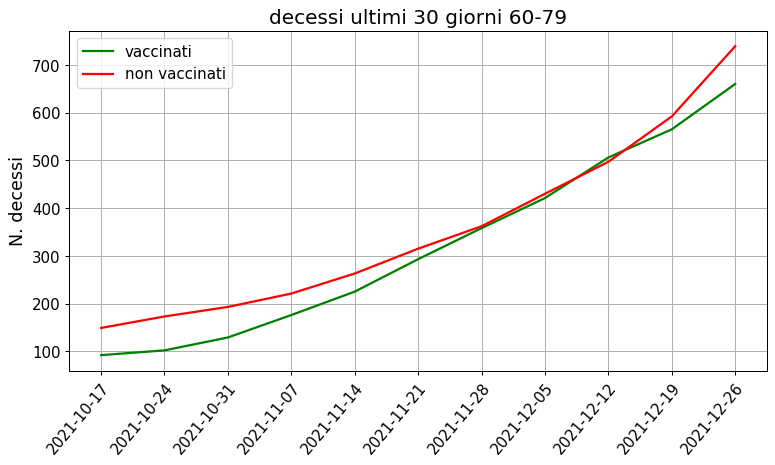

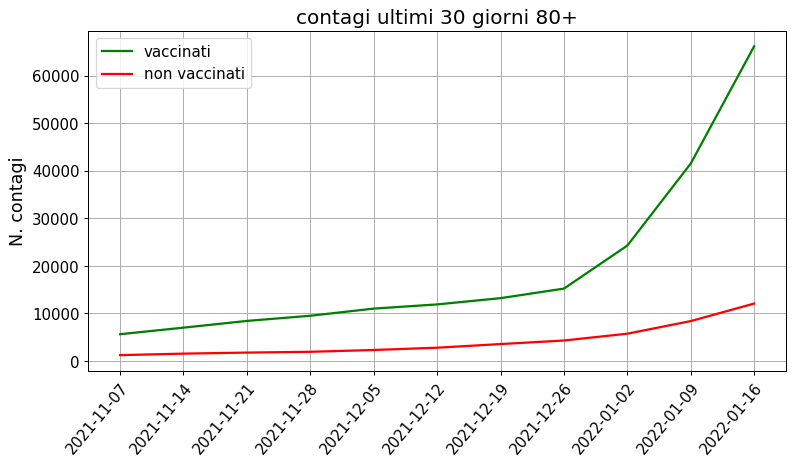

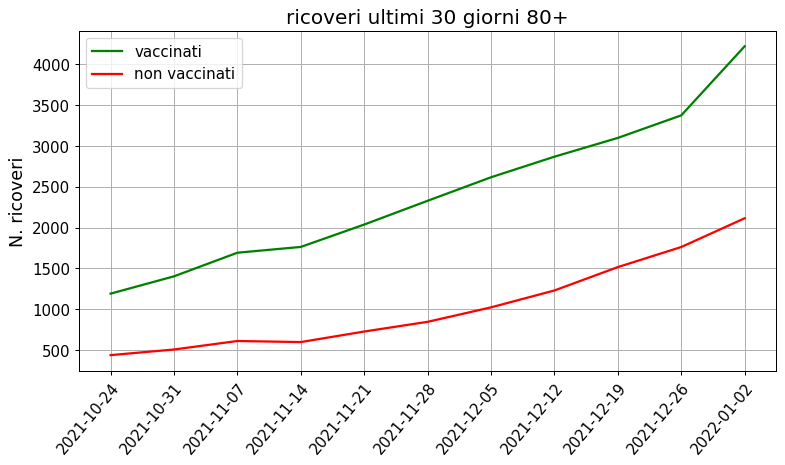

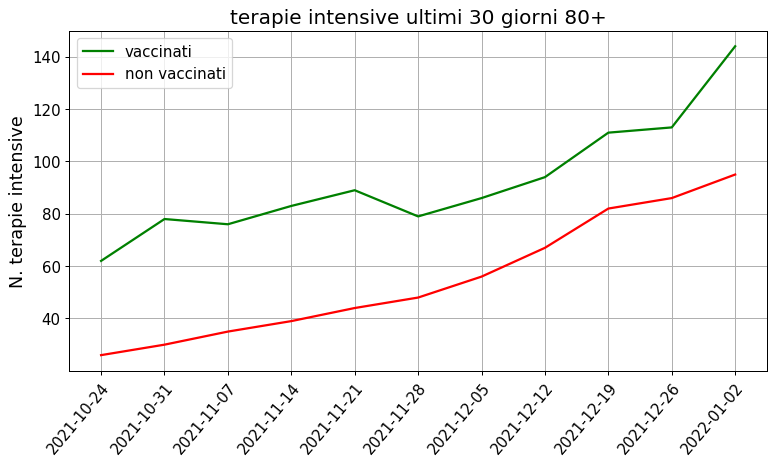

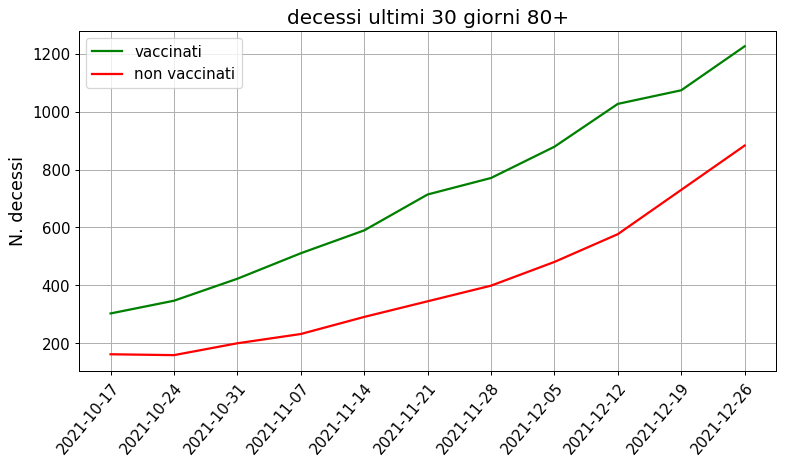

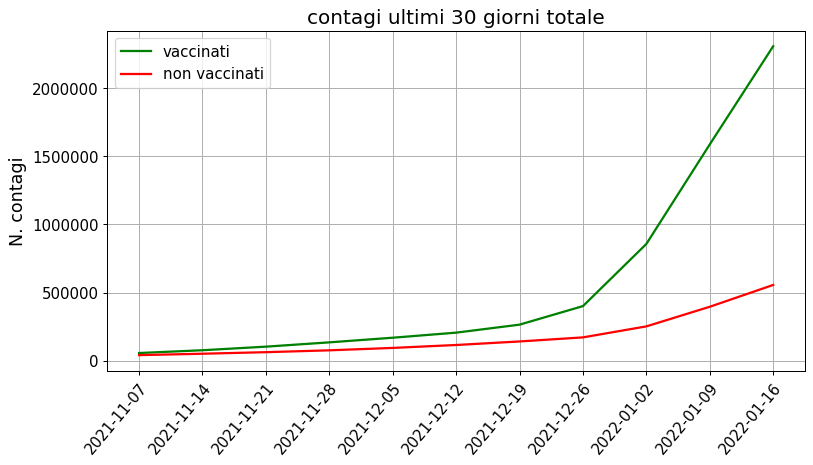

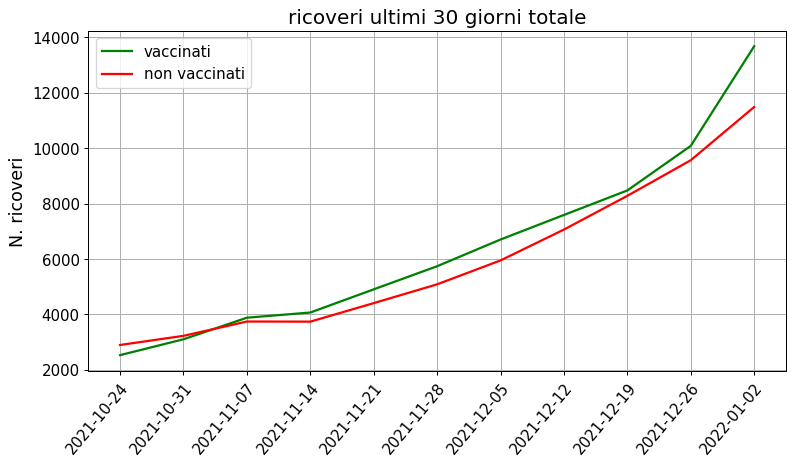

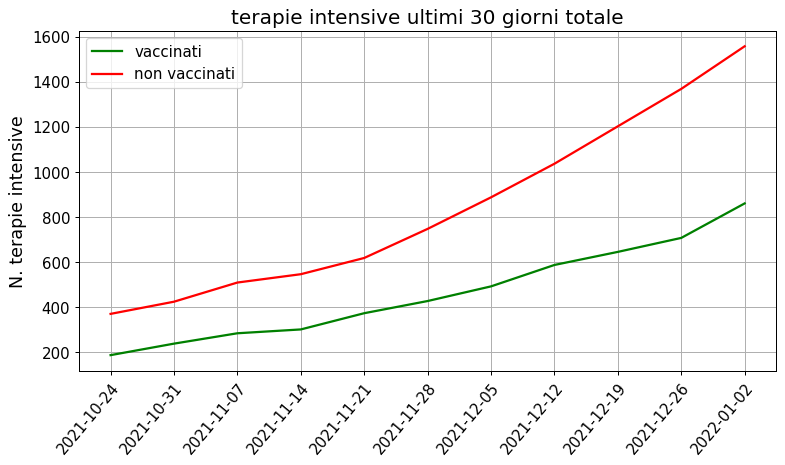

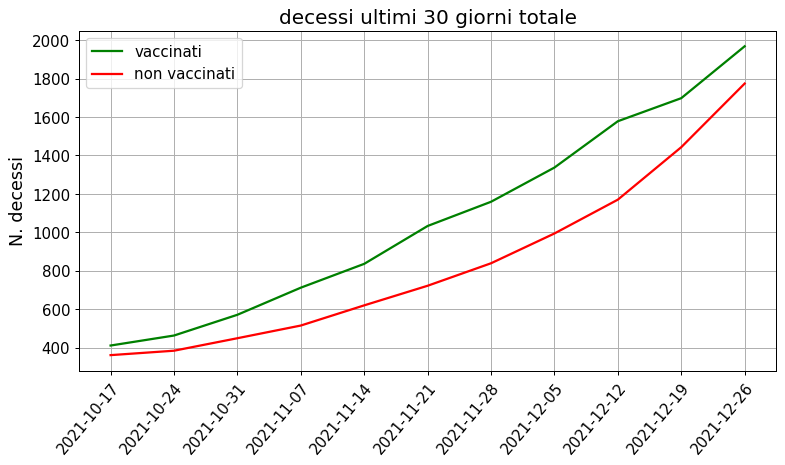

In [18]:
for age in age_values:
    for split in splits:
        df_plt = df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        savename = f"{split}_{age}"
        yvars = ["vax", "no_vax"]
        savename += "_" + "_".join(yvars)
        createXYPlot(df_plt,
                     y=yvars,
                     x="data",
                     labels=["vaccinati", "non vaccinati"],
                     colors=["g","r"],
                     plots_folder=plots_folder,
                     linewidth=1.8,
                     days_interval=1,
                     title=f"{split} ultimi 30 giorni {age}".replace("_"," "),
                     savename=savename,
                     ytitle=f"N. {split}".replace("_"," "),
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90
                    )

In [19]:
def get_lethality(df: pd.DataFrame, 
                  age: str,
                  savename: str,
                  title: str,
                  yscale: str ="linear",
                  num_den: tuple = ("decessi","contagi"),
                 ):

    value_cols = ["vax",
                  "no_vax",
                  "1_dose",
                  "2_dosi_lt_cut",
                  "2_dosi_gt_cut",
                  "booster",
                 ]
    df_pivot = df.pivot(index='data',columns=["split"],values=value_cols)
    cols = []
    for i in range(0,len(df_pivot.columns)):
        cols.append(df_pivot.columns.get_level_values(1)[i] + '_' + df_pivot.columns.get_level_values(0)[i])
    df_pivot.columns = cols
    
    display(df_pivot)
    for v in value_cols:
        df_pivot[f"letalita_{v}"] = df_pivot[f"{num_den[0]}_{v}"]/df_pivot[f"{num_den[1]}_{v}"]
        df_pivot[f"sd_letalita_{v}"] = np.sqrt(df_pivot[f"letalita_{v}"] * (1 - df_pivot[f"letalita_{v}"]) / df_pivot[f"contagi_{v}"])
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] - 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"hi_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] + 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"lo_err_letalita_{v}"].apply(lambda x: 0 if x < 0 else x)
    
    dates = df_pivot[[f"{num_den[0]}_no_vax",f"{num_den[1]}_no_vax"]].dropna().index
    plt.figure(figsize=(10,5),dpi=90)
    for y in ["no_vax", "1_dose", "2_dosi_lt_cut", "2_dosi_gt_cut", "booster"]:
        
        plt.plot(df_pivot.index, 
                 100*df_pivot[f"letalita_{y}"],
                 label=y,
                 linewidth=1.8
                )
        plt.fill_between(df_pivot.index, 
                     100*df_pivot[f"lo_err_letalita_{y}"], 
                     100*df_pivot[f"hi_err_letalita_{y}"],
                     alpha=0.1
                    )
    plt.grid()
    plt.legend(fontsize=12)
    plt.title(f"{title} -- {age} -- dati ISS",fontsize=19)
    plt.ylabel(f"{num_den[0]} / {num_den[1]} [%]",fontsize=14)
    _ = plt.yticks(fontsize=13)
    _ = plt.xticks(dates,
                   fontsize=13,
                   rotation=50, 
                   rotation_mode="anchor", 
                   verticalalignment = "top",
                   horizontalalignment = "right"
                  )
    plt.yscale(yscale)
    plt.savefig(f"./plots/{savename}.png", bbox_inches="tight")
    return df_pivot

,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,1.0,119.0,1.0,NaN,6.0,475.0,30.0,NaN,0.0,...,78.0,0.0,NaN,0.0,18.0,0.0,NaN,0.0,1.0,0.0
2021-10-31,NaN,1.0,158.0,1.0,NaN,7.0,476.0,24.0,NaN,0.0,...,94.0,0.0,NaN,0.0,20.0,0.0,NaN,0.0,1.0,0.0
2021-11-07,14693.0,1.0,180.0,0.0,18568.0,8.0,505.0,23.0,1513.0,0.0,...,121.0,0.0,1535.0,1.0,33.0,0.0,21.0,0.0,1.0,0.0
2021-11-14,20747.0,1.0,194.0,0.0,23176.0,7.0,496.0,24.0,1668.0,0.0,...,114.0,0.0,2163.0,1.0,49.0,0.0,44.0,0.0,1.0,0.0
2021-11-21,28637.0,1.0,227.0,3.0,28535.0,6.0,540.0,24.0,1730.0,0.0,...,131.0,1.0,2910.0,1.0,66.0,2.0,90.0,0.0,1.0,0.0
2021-11-28,39482.0,2.0,261.0,8.0,35062.0,8.0,586.0,27.0,2294.0,0.0,...,149.0,2.0,8092.0,1.0,77.0,2.0,173.0,0.0,3.0,4.0
2021-12-05,50674.0,2.0,318.0,7.0,43398.0,7.0,602.0,31.0,2513.0,0.0,...,185.0,4.0,10366.0,1.0,93.0,3.0,296.0,0.0,7.0,0.0
2021-12-12,64123.0,2.0,361.0,10.0,52862.0,8.0,684.0,39.0,2871.0,0.0,...,177.0,5.0,13430.0,1.0,140.0,4.0,527.0,0.0,8.0,0.0


,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,12.0,NaN,NaN,NaN,47.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,13.0,284.0,19.0,NaN,46.0,991.0,106.0,NaN,2.0,...,202.0,16.0,NaN,2.0,50.0,1.0,NaN,0.0,1.0,0.0
2021-10-31,NaN,18.0,379.0,23.0,NaN,49.0,1055.0,126.0,NaN,1.0,...,260.0,18.0,NaN,3.0,53.0,1.0,NaN,0.0,2.0,0.0
2021-11-07,20939.0,24.0,446.0,26.0,15027.0,54.0,1251.0,153.0,1284.0,3.0,...,325.0,19.0,2604.0,8.0,81.0,3.0,48.0,0.0,5.0,1.0
2021-11-14,28671.0,20.0,481.0,26.0,19051.0,59.0,1264.0,165.0,1504.0,3.0,...,259.0,12.0,3395.0,6.0,178.0,10.0,103.0,0.0,6.0,1.0
2021-11-21,38833.0,25.0,591.0,35.0,23381.0,56.0,1462.0,192.0,1660.0,3.0,...,299.0,13.0,4584.0,8.0,231.0,17.0,220.0,1.0,13.0,1.0
2021-11-28,49567.0,28.0,688.0,50.0,28740.0,70.0,1691.0,250.0,2087.0,3.0,...,349.0,20.0,13339.0,10.0,271.0,20.0,390.0,2.0,17.0,6.0
2021-12-05,64955.0,35.0,777.0,58.0,35738.0,76.0,1997.0,302.0,2311.0,3.0,...,360.0,22.0,20137.0,25.0,333.0,24.0,632.0,2.0,24.0,6.0
2021-12-12,80368.0,43.0,879.0,64.0,44643.0,88.0,2350.0,348.0,2664.0,4.0,...,180.0,12.0,26484.0,32.0,598.0,41.0,1047.0,3.0,34.0,4.0


,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,92.0,NaN,NaN,NaN,149.0,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,8.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,102.0,958.0,105.0,NaN,173.0,985.0,208.0,NaN,9.0,...,830.0,92.0,NaN,9.0,63.0,7.0,NaN,0.0,9.0,0.0
2021-10-31,NaN,129.0,1155.0,136.0,NaN,193.0,1181.0,244.0,NaN,5.0,...,1016.0,117.0,NaN,16.0,94.0,10.0,NaN,0.0,17.0,1.0
2021-11-07,14510.0,176.0,1556.0,182.0,5364.0,221.0,1369.0,298.0,551.0,6.0,...,1281.0,151.0,1202.0,85.0,174.0,20.0,77.0,1.0,31.0,1.0
2021-11-14,19719.0,225.0,1623.0,192.0,6797.0,263.0,1374.0,318.0,657.0,10.0,...,834.0,104.0,1817.0,121.0,670.0,75.0,136.0,4.0,32.0,1.0
2021-11-21,26601.0,293.0,2044.0,246.0,8231.0,315.0,1672.0,358.0,701.0,16.0,...,973.0,129.0,2932.0,154.0,922.0,101.0,258.0,8.0,49.0,5.0
2021-11-28,35521.0,358.0,2457.0,290.0,9783.0,362.0,1957.0,422.0,952.0,22.0,...,1126.0,139.0,14887.0,196.0,1165.0,134.0,454.0,14.0,56.0,2.0
2021-12-05,41494.0,421.0,2988.0,341.0,11779.0,430.0,2321.0,498.0,1085.0,28.0,...,1293.0,150.0,17689.0,325.0,1485.0,158.0,710.0,20.0,89.0,16.0
2021-12-12,49013.0,506.0,3478.0,419.0,14383.0,497.0,2794.0,582.0,1270.0,28.0,...,475.0,66.0,22404.0,396.0,2747.0,309.0,1160.0,25.0,114.0,23.0


,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,303.0,NaN,NaN,NaN,162.0,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,76.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,347.0,1192.0,62.0,NaN,159.0,439.0,26.0,NaN,8.0,...,664.0,40.0,NaN,124.0,487.0,21.0,NaN,0.0,6.0,1.0
2021-10-31,NaN,423.0,1404.0,78.0,NaN,200.0,508.0,30.0,NaN,10.0,...,705.0,42.0,NaN,172.0,659.0,34.0,NaN,5.0,15.0,1.0
2021-11-07,5626.0,511.0,1693.0,76.0,1223.0,232.0,612.0,35.0,118.0,13.0,...,710.0,39.0,2747.0,388.0,899.0,35.0,140.0,10.0,32.0,1.0
2021-11-14,7002.0,590.0,1764.0,83.0,1540.0,291.0,599.0,39.0,151.0,16.0,...,228.0,16.0,3840.0,476.0,1439.0,65.0,254.0,13.0,35.0,1.0
2021-11-21,8417.0,714.0,2038.0,89.0,1761.0,345.0,728.0,44.0,169.0,23.0,...,213.0,17.0,5093.0,582.0,1697.0,68.0,401.0,20.0,58.0,2.0
2021-11-28,9505.0,771.0,2329.0,79.0,1927.0,399.0,847.0,48.0,254.0,29.0,...,219.0,13.0,7705.0,631.0,1919.0,64.0,693.0,29.0,100.0,0.0
2021-12-05,11009.0,879.0,2617.0,86.0,2305.0,481.0,1024.0,56.0,272.0,44.0,...,227.0,10.0,8862.0,757.0,2136.0,69.0,1014.0,40.0,152.0,4.0
2021-12-12,11890.0,1027.0,2869.0,94.0,2786.0,577.0,1231.0,67.0,302.0,57.0,...,102.0,6.0,9245.0,869.0,2442.0,79.0,1485.0,56.0,212.0,6.0


,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,411.0,NaN,NaN,NaN,361.0,NaN,NaN,NaN,27.0,...,NaN,NaN,NaN,85.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,463.0,2523.0,187.0,NaN,384.0,2890.0,370.0,NaN,19.0,...,1744.0,148.0,NaN,135.0,618.0,29.0,NaN,0.0,17.0,1.0
2021-10-31,NaN,571.0,3096.0,238.0,NaN,449.0,3220.0,424.0,NaN,16.0,...,2075.0,177.0,NaN,191.0,826.0,45.0,NaN,5.0,35.0,2.0
2021-11-07,55768.0,712.0,3875.0,284.0,40182.0,515.0,3737.0,509.0,3466.0,22.0,...,2437.0,209.0,8088.0,482.0,1187.0,58.0,286.0,11.0,69.0,3.0
2021-11-14,76139.0,836.0,4062.0,301.0,50564.0,620.0,3733.0,546.0,3980.0,29.0,...,1435.0,132.0,11215.0,604.0,2336.0,150.0,537.0,17.0,74.0,3.0
2021-11-21,102488.0,1033.0,4900.0,373.0,61908.0,722.0,4402.0,618.0,4260.0,42.0,...,1616.0,160.0,15519.0,745.0,2916.0,188.0,969.0,29.0,121.0,8.0
2021-11-28,134075.0,1159.0,5735.0,427.0,75512.0,839.0,5081.0,747.0,5587.0,54.0,...,1843.0,174.0,44023.0,838.0,3432.0,220.0,1710.0,45.0,176.0,12.0
2021-12-05,168132.0,1337.0,6700.0,492.0,93220.0,994.0,5944.0,887.0,6181.0,75.0,...,2065.0,186.0,57054.0,1108.0,4047.0,254.0,2652.0,62.0,272.0,26.0
2021-12-12,205394.0,1578.0,7587.0,587.0,114674.0,1170.0,7059.0,1036.0,7107.0,89.0,...,934.0,89.0,71563.0,1298.0,5927.0,433.0,4219.0,84.0,368.0,33.0


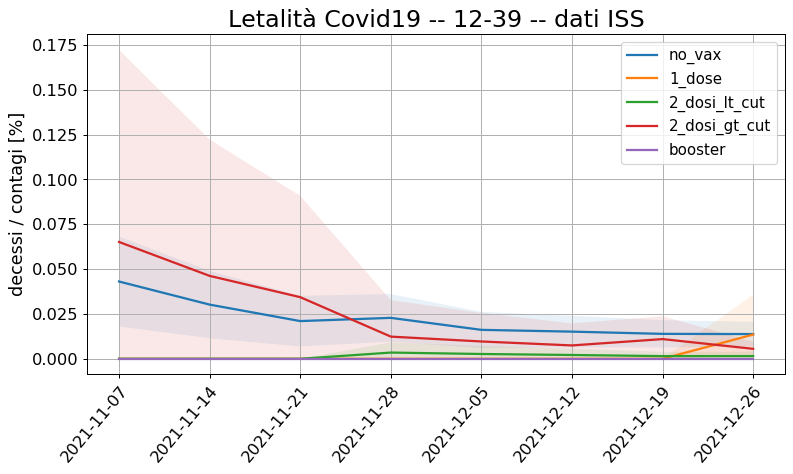

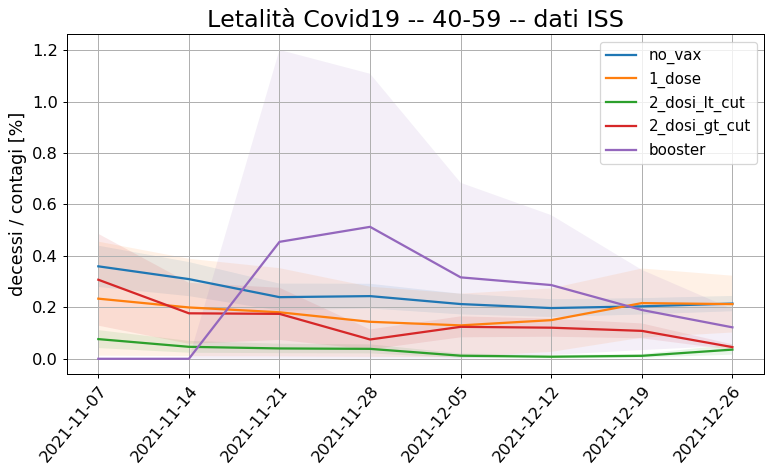

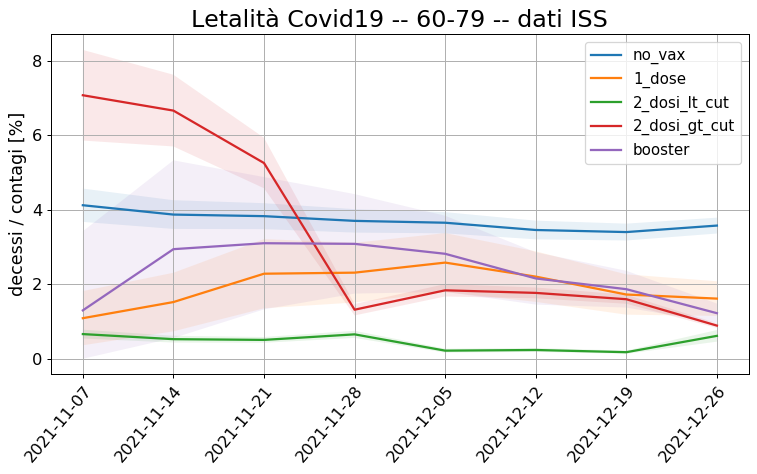

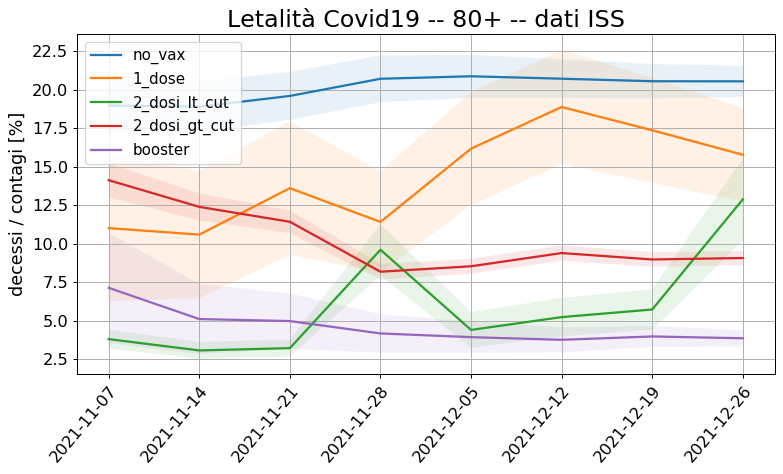

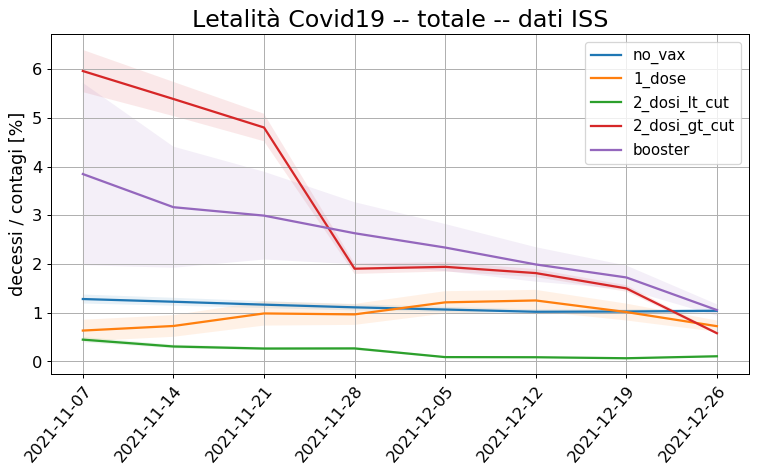

In [20]:
for age in age_values:
    df_let = df_iss[df_iss.fascia_eta==age]
    get_lethality(df_let,
                  age=age,
                  savename=f"letalita_iss_{age}",
                  title="Letalità Covid19",
                  yscale="linear"
                 )

,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,1.0,119.0,1.0,NaN,6.0,475.0,30.0,NaN,0.0,...,78.0,0.0,NaN,0.0,18.0,0.0,NaN,0.0,1.0,0.0
2021-10-31,NaN,1.0,158.0,1.0,NaN,7.0,476.0,24.0,NaN,0.0,...,94.0,0.0,NaN,0.0,20.0,0.0,NaN,0.0,1.0,0.0
2021-11-07,14693.0,1.0,180.0,0.0,18568.0,8.0,505.0,23.0,1513.0,0.0,...,121.0,0.0,1535.0,1.0,33.0,0.0,21.0,0.0,1.0,0.0
2021-11-14,20747.0,1.0,194.0,0.0,23176.0,7.0,496.0,24.0,1668.0,0.0,...,114.0,0.0,2163.0,1.0,49.0,0.0,44.0,0.0,1.0,0.0
2021-11-21,28637.0,1.0,227.0,3.0,28535.0,6.0,540.0,24.0,1730.0,0.0,...,131.0,1.0,2910.0,1.0,66.0,2.0,90.0,0.0,1.0,0.0
2021-11-28,39482.0,2.0,261.0,8.0,35062.0,8.0,586.0,27.0,2294.0,0.0,...,149.0,2.0,8092.0,1.0,77.0,2.0,173.0,0.0,3.0,4.0
2021-12-05,50674.0,2.0,318.0,7.0,43398.0,7.0,602.0,31.0,2513.0,0.0,...,185.0,4.0,10366.0,1.0,93.0,3.0,296.0,0.0,7.0,0.0
2021-12-12,64123.0,2.0,361.0,10.0,52862.0,8.0,684.0,39.0,2871.0,0.0,...,177.0,5.0,13430.0,1.0,140.0,4.0,527.0,0.0,8.0,0.0


,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,12.0,NaN,NaN,NaN,47.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,13.0,284.0,19.0,NaN,46.0,991.0,106.0,NaN,2.0,...,202.0,16.0,NaN,2.0,50.0,1.0,NaN,0.0,1.0,0.0
2021-10-31,NaN,18.0,379.0,23.0,NaN,49.0,1055.0,126.0,NaN,1.0,...,260.0,18.0,NaN,3.0,53.0,1.0,NaN,0.0,2.0,0.0
2021-11-07,20939.0,24.0,446.0,26.0,15027.0,54.0,1251.0,153.0,1284.0,3.0,...,325.0,19.0,2604.0,8.0,81.0,3.0,48.0,0.0,5.0,1.0
2021-11-14,28671.0,20.0,481.0,26.0,19051.0,59.0,1264.0,165.0,1504.0,3.0,...,259.0,12.0,3395.0,6.0,178.0,10.0,103.0,0.0,6.0,1.0
2021-11-21,38833.0,25.0,591.0,35.0,23381.0,56.0,1462.0,192.0,1660.0,3.0,...,299.0,13.0,4584.0,8.0,231.0,17.0,220.0,1.0,13.0,1.0
2021-11-28,49567.0,28.0,688.0,50.0,28740.0,70.0,1691.0,250.0,2087.0,3.0,...,349.0,20.0,13339.0,10.0,271.0,20.0,390.0,2.0,17.0,6.0
2021-12-05,64955.0,35.0,777.0,58.0,35738.0,76.0,1997.0,302.0,2311.0,3.0,...,360.0,22.0,20137.0,25.0,333.0,24.0,632.0,2.0,24.0,6.0
2021-12-12,80368.0,43.0,879.0,64.0,44643.0,88.0,2350.0,348.0,2664.0,4.0,...,180.0,12.0,26484.0,32.0,598.0,41.0,1047.0,3.0,34.0,4.0


,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,92.0,NaN,NaN,NaN,149.0,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,8.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,102.0,958.0,105.0,NaN,173.0,985.0,208.0,NaN,9.0,...,830.0,92.0,NaN,9.0,63.0,7.0,NaN,0.0,9.0,0.0
2021-10-31,NaN,129.0,1155.0,136.0,NaN,193.0,1181.0,244.0,NaN,5.0,...,1016.0,117.0,NaN,16.0,94.0,10.0,NaN,0.0,17.0,1.0
2021-11-07,14510.0,176.0,1556.0,182.0,5364.0,221.0,1369.0,298.0,551.0,6.0,...,1281.0,151.0,1202.0,85.0,174.0,20.0,77.0,1.0,31.0,1.0
2021-11-14,19719.0,225.0,1623.0,192.0,6797.0,263.0,1374.0,318.0,657.0,10.0,...,834.0,104.0,1817.0,121.0,670.0,75.0,136.0,4.0,32.0,1.0
2021-11-21,26601.0,293.0,2044.0,246.0,8231.0,315.0,1672.0,358.0,701.0,16.0,...,973.0,129.0,2932.0,154.0,922.0,101.0,258.0,8.0,49.0,5.0
2021-11-28,35521.0,358.0,2457.0,290.0,9783.0,362.0,1957.0,422.0,952.0,22.0,...,1126.0,139.0,14887.0,196.0,1165.0,134.0,454.0,14.0,56.0,2.0
2021-12-05,41494.0,421.0,2988.0,341.0,11779.0,430.0,2321.0,498.0,1085.0,28.0,...,1293.0,150.0,17689.0,325.0,1485.0,158.0,710.0,20.0,89.0,16.0
2021-12-12,49013.0,506.0,3478.0,419.0,14383.0,497.0,2794.0,582.0,1270.0,28.0,...,475.0,66.0,22404.0,396.0,2747.0,309.0,1160.0,25.0,114.0,23.0


,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,303.0,NaN,NaN,NaN,162.0,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,76.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,347.0,1192.0,62.0,NaN,159.0,439.0,26.0,NaN,8.0,...,664.0,40.0,NaN,124.0,487.0,21.0,NaN,0.0,6.0,1.0
2021-10-31,NaN,423.0,1404.0,78.0,NaN,200.0,508.0,30.0,NaN,10.0,...,705.0,42.0,NaN,172.0,659.0,34.0,NaN,5.0,15.0,1.0
2021-11-07,5626.0,511.0,1693.0,76.0,1223.0,232.0,612.0,35.0,118.0,13.0,...,710.0,39.0,2747.0,388.0,899.0,35.0,140.0,10.0,32.0,1.0
2021-11-14,7002.0,590.0,1764.0,83.0,1540.0,291.0,599.0,39.0,151.0,16.0,...,228.0,16.0,3840.0,476.0,1439.0,65.0,254.0,13.0,35.0,1.0
2021-11-21,8417.0,714.0,2038.0,89.0,1761.0,345.0,728.0,44.0,169.0,23.0,...,213.0,17.0,5093.0,582.0,1697.0,68.0,401.0,20.0,58.0,2.0
2021-11-28,9505.0,771.0,2329.0,79.0,1927.0,399.0,847.0,48.0,254.0,29.0,...,219.0,13.0,7705.0,631.0,1919.0,64.0,693.0,29.0,100.0,0.0
2021-12-05,11009.0,879.0,2617.0,86.0,2305.0,481.0,1024.0,56.0,272.0,44.0,...,227.0,10.0,8862.0,757.0,2136.0,69.0,1014.0,40.0,152.0,4.0
2021-12-12,11890.0,1027.0,2869.0,94.0,2786.0,577.0,1231.0,67.0,302.0,57.0,...,102.0,6.0,9245.0,869.0,2442.0,79.0,1485.0,56.0,212.0,6.0


,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,411.0,NaN,NaN,NaN,361.0,NaN,NaN,NaN,27.0,...,NaN,NaN,NaN,85.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,463.0,2523.0,187.0,NaN,384.0,2890.0,370.0,NaN,19.0,...,1744.0,148.0,NaN,135.0,618.0,29.0,NaN,0.0,17.0,1.0
2021-10-31,NaN,571.0,3096.0,238.0,NaN,449.0,3220.0,424.0,NaN,16.0,...,2075.0,177.0,NaN,191.0,826.0,45.0,NaN,5.0,35.0,2.0
2021-11-07,55768.0,712.0,3875.0,284.0,40182.0,515.0,3737.0,509.0,3466.0,22.0,...,2437.0,209.0,8088.0,482.0,1187.0,58.0,286.0,11.0,69.0,3.0
2021-11-14,76139.0,836.0,4062.0,301.0,50564.0,620.0,3733.0,546.0,3980.0,29.0,...,1435.0,132.0,11215.0,604.0,2336.0,150.0,537.0,17.0,74.0,3.0
2021-11-21,102488.0,1033.0,4900.0,373.0,61908.0,722.0,4402.0,618.0,4260.0,42.0,...,1616.0,160.0,15519.0,745.0,2916.0,188.0,969.0,29.0,121.0,8.0
2021-11-28,134075.0,1159.0,5735.0,427.0,75512.0,839.0,5081.0,747.0,5587.0,54.0,...,1843.0,174.0,44023.0,838.0,3432.0,220.0,1710.0,45.0,176.0,12.0
2021-12-05,168132.0,1337.0,6700.0,492.0,93220.0,994.0,5944.0,887.0,6181.0,75.0,...,2065.0,186.0,57054.0,1108.0,4047.0,254.0,2652.0,62.0,272.0,26.0
2021-12-12,205394.0,1578.0,7587.0,587.0,114674.0,1170.0,7059.0,1036.0,7107.0,89.0,...,934.0,89.0,71563.0,1298.0,5927.0,433.0,4219.0,84.0,368.0,33.0


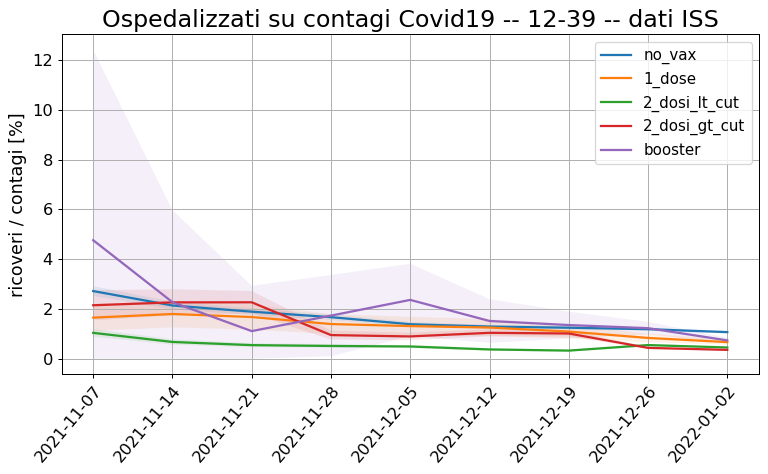

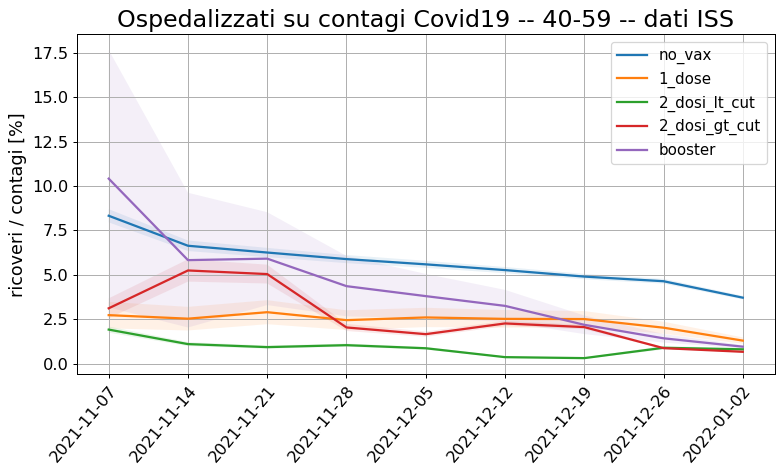

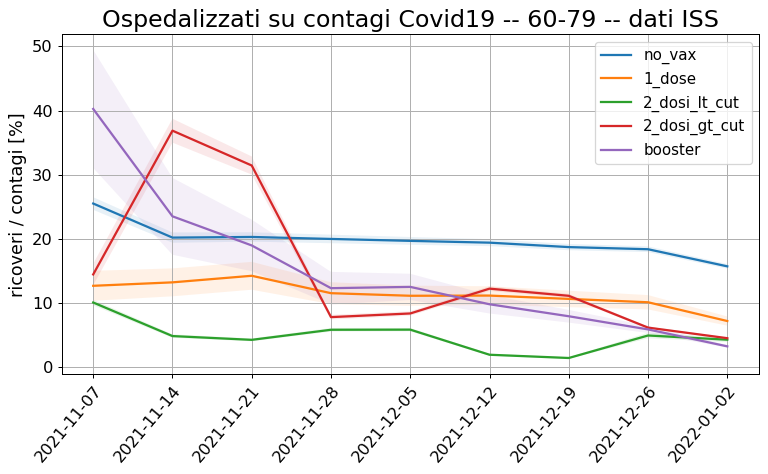

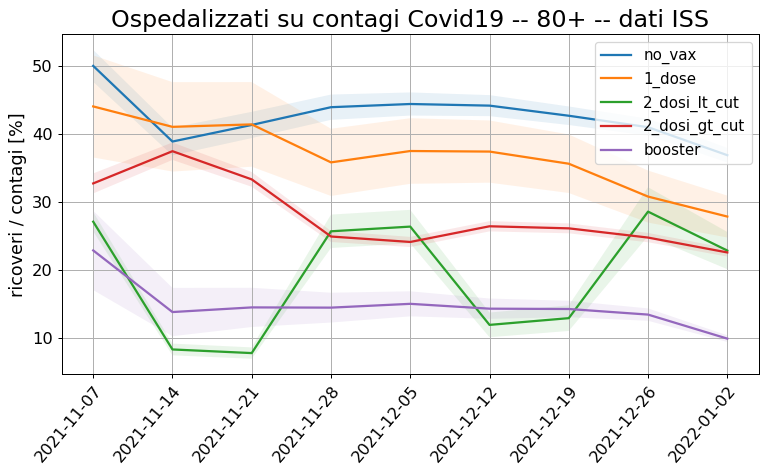

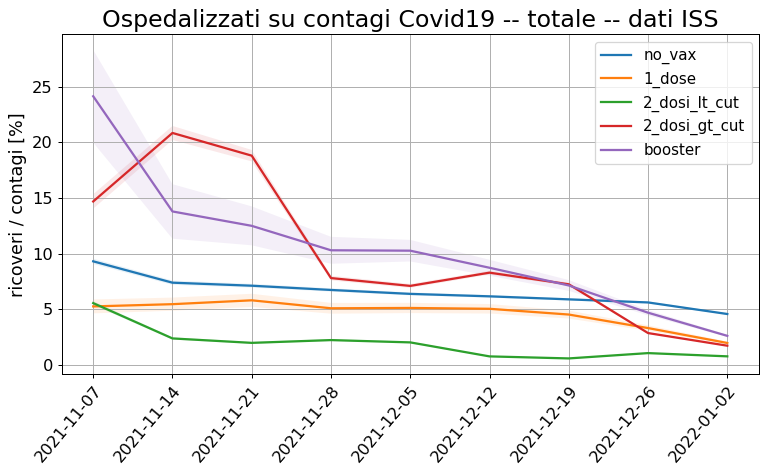

In [21]:
for age in age_values:
    df_let = df_iss[df_iss.fascia_eta==age]
    get_lethality(df_let,
                  age=age,
                  savename=f"ospedalizzati_contagi_iss_{age}",
                  title="Ospedalizzati su contagi Covid19",
                  yscale="linear",
                  num_den=("ricoveri","contagi")
                 )

,contagi_vax,decessi_vax,ricoveri_vax,terapie_intensive_vax,contagi_no_vax,decessi_no_vax,ricoveri_no_vax,terapie_intensive_no_vax,contagi_1_dose,decessi_1_dose,...,ricoveri_2_dosi_lt_cut,terapie_intensive_2_dosi_lt_cut,contagi_2_dosi_gt_cut,decessi_2_dosi_gt_cut,ricoveri_2_dosi_gt_cut,terapie_intensive_2_dosi_gt_cut,contagi_booster,decessi_booster,ricoveri_booster,terapie_intensive_booster
data,,,,,,,,,,,,,,,,,,,,,
2021-10-17,NaN,303.0,NaN,NaN,NaN,162.0,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,76.0,NaN,NaN,NaN,0.0,NaN,NaN
2021-10-24,NaN,347.0,1192.0,62.0,NaN,159.0,439.0,26.0,NaN,8.0,...,664.0,40.0,NaN,124.0,487.0,21.0,NaN,0.0,6.0,1.0
2021-10-31,NaN,423.0,1404.0,78.0,NaN,200.0,508.0,30.0,NaN,10.0,...,705.0,42.0,NaN,172.0,659.0,34.0,NaN,5.0,15.0,1.0
2021-11-07,5626.0,511.0,1693.0,76.0,1223.0,232.0,612.0,35.0,118.0,13.0,...,710.0,39.0,2747.0,388.0,899.0,35.0,140.0,10.0,32.0,1.0
2021-11-14,7002.0,590.0,1764.0,83.0,1540.0,291.0,599.0,39.0,151.0,16.0,...,228.0,16.0,3840.0,476.0,1439.0,65.0,254.0,13.0,35.0,1.0
2021-11-21,8417.0,714.0,2038.0,89.0,1761.0,345.0,728.0,44.0,169.0,23.0,...,213.0,17.0,5093.0,582.0,1697.0,68.0,401.0,20.0,58.0,2.0
2021-11-28,9505.0,771.0,2329.0,79.0,1927.0,399.0,847.0,48.0,254.0,29.0,...,219.0,13.0,7705.0,631.0,1919.0,64.0,693.0,29.0,100.0,0.0
2021-12-05,11009.0,879.0,2617.0,86.0,2305.0,481.0,1024.0,56.0,272.0,44.0,...,227.0,10.0,8862.0,757.0,2136.0,69.0,1014.0,40.0,152.0,4.0
2021-12-12,11890.0,1027.0,2869.0,94.0,2786.0,577.0,1231.0,67.0,302.0,57.0,...,102.0,6.0,9245.0,869.0,2442.0,79.0,1485.0,56.0,212.0,6.0


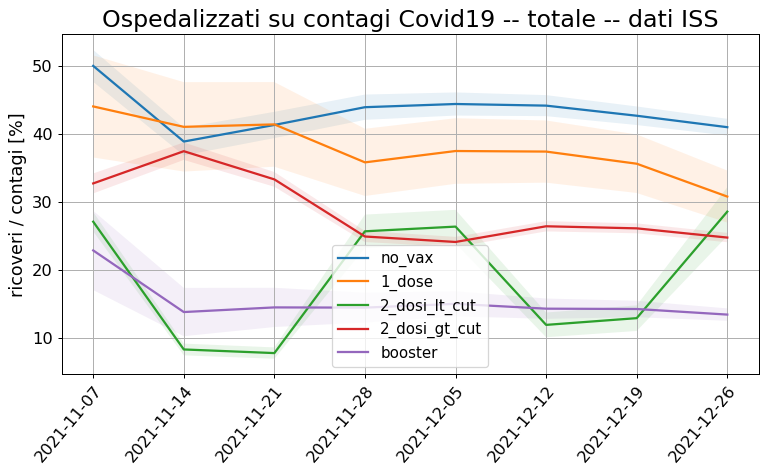

In [92]:
df_let = df_iss[df_iss.fascia_eta=="80+"]
p = get_lethality(df_let,
                  savename=f"ospedalizzati_contagi_iss_{age}",
                  title="Ospedalizzati su contagi Covid19",
                  yscale="linear",
                  num_den=("ricoveri","contagi")
                 )

In [83]:
p[["contagi_2_dosi_lt_cut","ricoveri_2_dosi_lt_cut","cut"]]

KeyError: "['cut'] not in index"

In [27]:
from dateutil.relativedelta import relativedelta
path = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df_daily = getVariables(pd.read_csv(path))


df_daily["data"] = pd.to_datetime(df_daily["data"])
df_daily["data"] = df_daily["data"].apply(lambda x: x.date())
df_daily["data_prev"] = pd.to_datetime("2021-12-10")

In [494]:
df_test = df_daily[(df_daily.data > datetime.strptime("2021-12-10","%Y-%m-%d").date()) & 
         (df_daily.data < datetime.strptime("2022-01-09","%Y-%m-%d").date())][["data","dow","nuovi_positivi"]]

In [495]:
np.sum(df_test["nuovi_positivi"])

2096038

In [500]:
np.sum(df_contagi[df_contagi.fascia_eta=="totale"][["vax","no_vax"]],axis=1)

4       95950
9      126703
14     164396
19     209587
24     261352
29     320068
34     404745
39     570898
44    1108367
49    1983622
dtype: int64

In [489]:
for v in ["ingressi_terapia_intensiva", "nuovi_positivi"]:
    df_daily[f"{v}_last_month"] = df_daily.apply(lambda x: df_daily.loc[(df_daily.data >= x.data_prev) & 
                                                                 (df_daily.data < x.data), v].sum(), axis=1)


In [490]:
df_ti_comp      = df_ti[df_ti.fascia_eta=="totale"][["data","vax","no_vax"]]
df_contagi_comp = df_contagi[df_contagi.fascia_eta=="totale"][["data","vax","no_vax"]]

df_ti_comp["data"] = pd.to_datetime(df_ti_comp["data"]).apply(lambda x: x.date())
df_contagi_comp["data"] = pd.to_datetime(df_contagi_comp["data"]).apply(lambda x: x.date())

df_daily_comp = df_daily[["data","ingressi_terapia_intensiva_last_month","nuovi_positivi_last_month"]]

In [478]:
df_comp_contagi = df_daily_comp.merge(df_contagi_comp, on="data", how="inner")
df_comp_contagi["tot"] = df_comp_contagi["vax"] + df_comp_contagi["no_vax"]
df_comp_contagi["diff"] = df_comp_contagi["tot"] - df_comp_contagi["nuovi_positivi_last_month"] 

,data,nuovi_positivi
655,2021-12-10,20497
656,2021-12-11,21042
657,2021-12-12,19215
658,2021-12-13,12712
659,2021-12-14,20677
660,2021-12-15,23195
661,2021-12-16,26109
662,2021-12-17,28632
663,2021-12-18,28064
664,2021-12-19,24259


In [480]:
df_comp_contagi[["data","nuovi_positivi_last_month","tot","diff"]]

,data,nuovi_positivi_last_month,tot,diff
0,2021-11-07,0,95950,95950
1,2021-11-14,0,126703,126703
2,2021-11-21,0,164396,164396
3,2021-11-28,0,209587,209587
4,2021-12-05,0,261352,261352
5,2021-12-12,41539,320068,278529
6,2021-12-19,200143,404745,204602
7,2021-12-26,457662,570898,113236
8,2022-01-02,1102187,1108367,6180
9,2022-01-09,2116535,1983622,-132913


In [ ]:
df_comp = df_daily_comp.merge(df_ti_comp, on="data", how="inner")
df_comp["tot"] = df_comp["vax"] + df_comp["no_vax"]
df_comp["diff"] = df_comp["tot"] - df_comp["ingressi_terapia_intensiva_last_month"] 

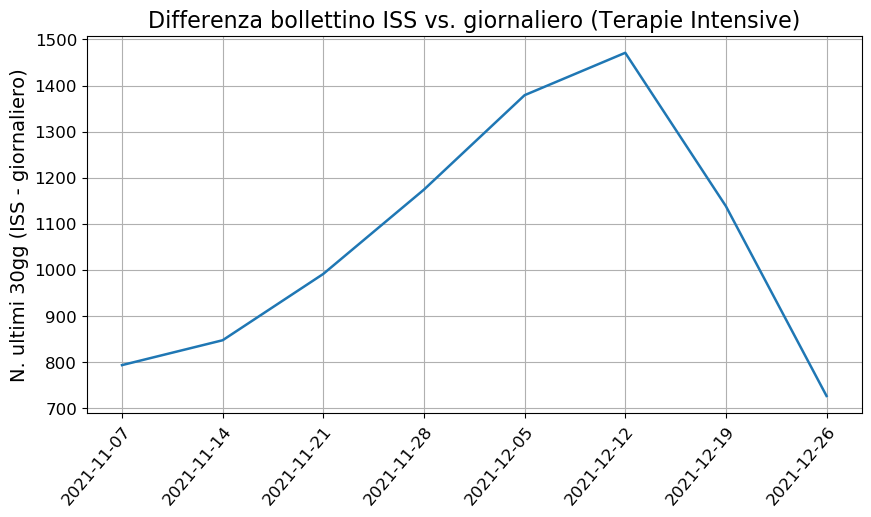

In [460]:
createXYPlot(df_comp,
             x="data",
             y=["diff"],
             title="Differenza bollettino ISS vs. giornaliero (Terapie Intensive)",
             plots_folder=None,
             days_interval=1,
             linewidth=1.8,
             start_date="2021-11-01",
             ytitle="N. ultimi 30gg (ISS - giornaliero)"
            )

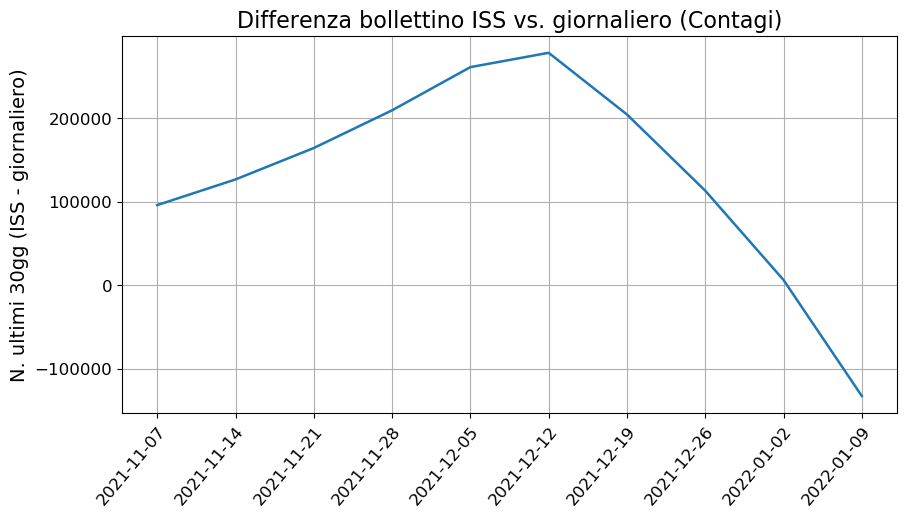

In [462]:
createXYPlot(df_comp_contagi,
             x="data",
             y=["diff"],
             title="Differenza bollettino ISS vs. giornaliero (Contagi)",
             plots_folder=None,
             days_interval=1,
             linewidth=1.8,
             start_date="2021-11-01",
             ytitle="N. ultimi 30gg (ISS - giornaliero)"
            )

In [453]:
df_comp_contagi

,data,ingressi_terapia_intensiva_last_month,nuovi_positivi_last_month,vax,no_vax,tot,diff
0,2021-11-07,0.0,0,55768,40182,95950,95950
1,2021-11-14,0.0,0,76139,50564,126703,126703
2,2021-11-21,0.0,0,102488,61908,164396,164396
3,2021-11-28,0.0,0,134075,75512,209587,209587
4,2021-12-05,0.0,0,168132,93220,261352,261352
5,2021-12-12,206.0,60754,205394,114674,320068,259314
6,2021-12-19,787.0,224402,264068,140677,404745,180343
7,2021-12-26,1434.0,482545,400347,170551,570898,88353
8,2022-01-02,2271.0,1163233,856955,251412,1108367,-54866
9,2022-01-09,3252.0,2272194,1588198,395424,1983622,-288572


In [33]:
import pandas as pd
pd.read_csv("https://data.gov.il/dataset/covid-19/resource/8a51c65b-f95a-4fb8-bd97-65f47109f41f/download/event-among-vaccinated-126.csv")

,"<html><head><meta charset=""utf-8""><script>C9xx.T9xx=T9xx;C9xx.g8=window;;n0II(C9xx.g8);T9TT(C9xx.g8);C9xx.D9S=(function(){var Z9S=2;for(;Z9S !== 1;){switch(Z9S){case 2:return {f8:(function(m8){var u9S=2;for(;u9S !== 10;){switch(u9S){case 2:var D8=function(l8){var h9S=2;for(;h9S !== 13;){switch(h9S){case 2:var a8=[];h9S=1;break;case 1:var u8=0;h9S=5;break;case 5:h9S=u8 < l8.length?4:9;break;case 4:a8.C0II(j0II.I0II(l8[u8] + 36));h9S=3;break;case 14:return e8;break;case 3:u8++;h9S=5;break;case 9:var k8",e8;h9S=8;break;case 8:k8=a8.o0II(function(){var n9S=2;for(;n9S !== 1;){switch(n9S){case 2:return 0.5 - s0II.W0II();break;}}}).m0II('');e8=C9xx[k8];h9S=6;break;case 6:h9S=!e8?8:14;break;}}};u9S=1;break;case 1:var C8='',s8=D0II(D8([48,21,84,84])());u9S=5;break;case 5:var o8=0,I8=0;u9S=4;break;case 9:I8=0;u9S=8;break;case 4:u9S=o8 < s8.length?3:6;break;case 3:u9S=I8 === m8.length?9:8;break;case 8:C8+=j0II.I0II(s8.E0II(o8) ^ m8.E0II(I8));u9S=7;break;case 6:C8=C8.u0II('@');var j8=0;var W8=function(S8){var Q9S=2;for(;Q9S !== 16;){switch(Q9S){case 3:C8.a0II.e0II(C8,C8.l0II(-4,4).l0II(0,2));Q9S=5;break;case 11:C8.a0II.e0II(C8,...,window[h53.L9S(174)][h53.N9S(420)]];S0(btoa(T6U[8][h53.L9S(91)](m3U[44]))[h53.N9S(515)](/\x3d/g,h53.L9S(19)),h53.L9S(398),p6U[0][0],false);}else {x6U[8]++;h53.k3U(22);x6U[4]=h53.F3U(x6U[0][0],x6U[8]);x6U[1]=(1.1,m3U[72])(x6U[4].1,x6U[0][1]);setTimeout(x6U[6],0);}};(1,x6U[6])();}};}else {window[h53.L9S(357)]=function(){h53.F53();return 0x23;};}})();
0,";;window.rbzns={bereshit: ""1""","seed: ""kMDiI1AMRvA2YqrnbCaROeiVTGy8PVyII+OUZ0...","storage:""3""};winsocks();</script></head><body...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
